In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('crop_recommendation.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  79  34  37    20.879744  82.002744  6.502985  202.935536  rice
1  78  21  20    21.770462  80.319644  7.038096  226.655537  rice
2  92  31  34    23.004459  82.320763  7.840207  263.964248  rice
3  98  38  45    26.491096  80.158363  6.980401  242.864034  rice
4  79  53  43    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.shape

(2200, 8)

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'].value_counts()

pomegranate    100
jute           100
coconut        100
cotton         100
banana         100
pigeonpeas     100
chickpea       100
kidneybeans    100
watermelon     100
lentil         100
muskmelon      100
mothbeans      100
blackgram      100
mungbean       100
grapes         100
maize          100
coffee         100
apple          100
rice           100
papaya         100
orange         100
mango          100
Name: label, dtype: int64

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
labels_map

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [9]:
dummm = df.copy()
df['label'] = df['label'].map(labels_map)
df.head()

N   P   K  temperature   humidity        ph    rainfall  label
0  79  34  37    20.879744  82.002744  6.502985  202.935536      1
1  78  21  20    21.770462  80.319644  7.038096  226.655537      1
2  92  31  34    23.004459  82.320763  7.840207  263.964248      1
3  98  38  45    26.491096  80.158363  6.980401  242.864034      1
4  79  53  43    20.130175  81.604873  7.628473  262.717340      1

<AxesSubplot:xlabel='label', ylabel='count'>

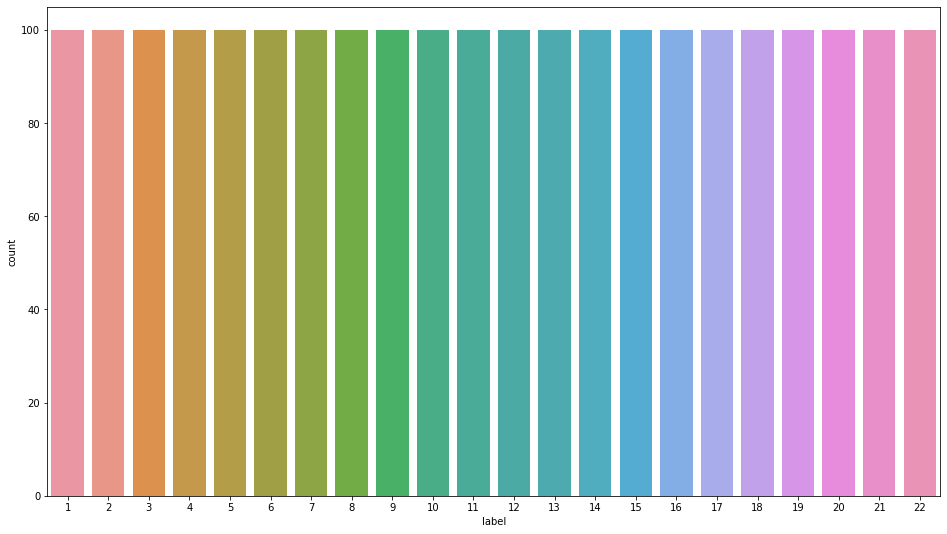

In [10]:
sn.set_palette('Set3')
plt.figure(figsize=(16,9))
sn.countplot(data=df,x = 'label')

In [11]:
import scipy.stats as stats

In [12]:
temp = df.copy()

In [13]:
upper_list = []
lower_list = []

for i in temp.columns[:-1]:
    upper_list.append(df[i].mean()+(df[i].std())*3)
    lower_list.append(df[i].mean()-(df[i].std())*3)
    

In [14]:
j = 0
for i in temp.columns[:-1]:
    dummy = temp[(temp[i]>upper_list[j])|(temp[i]<lower_list[j])];j+=1

In [15]:
dummy

N   P   K  temperature   humidity        ph    rainfall  label
6    75  23  28    22.708838  82.639414  5.700806  271.324860      1
12   86  52  48    26.800796  80.886848  5.108682  284.436457      1
16   61  46  51    21.587118  82.788371  6.249051  276.655246      1
19  100  46  34    23.579436  83.587603  5.853932  291.298662      1
26   96  32  31    26.359272  84.044036  6.286500  271.358614      1
30   68  34  49    21.446540  84.943760  5.824709  272.201720      1
33   94  25  30    20.267076  81.638952  5.014507  270.441727      1
36   78  23  40    26.757542  81.177340  5.960370  272.299906      1
37   74  42  29    23.863305  83.152508  5.561399  285.249365      1
38   68  60  49    21.019447  82.952217  7.416245  298.401847      1
43   83  44  50    23.830675  84.813601  6.271479  298.560117      1
54   73  30  40    26.229169  83.836258  5.543360  286.508373      1
55   78  34  25    23.446768  84.793524  6.215110  283.933847      1
59   93  39  39    21.723831  80.238990  6.501698  277.962619      1
62   71  31  52    20.615214  83.773456  6.932400  279.545172      1
69  100  57  31    23.431916  80.568878  6.363472  269.503916      1
72   64  33  26    24.873007  82.840226  6.587919  295.609449      1
75   99  51  39    22.228698  81.858729  6.939084  278.079179      1
76   77  41  44    26.730724  81.785968  7.868475  280.404439      1
90   81  30  26    26.929951  81.914112  7.069172  290.679378      1
96   81  35  40    21.533463  82.140041  6.500343  295.924880      1
97   90  22  42    21.408658  83.329319  5.935745  287.576694      1

In [16]:
# Outlier Removal using IQR technique

def quantile(df,val):
    a = []
    df_upper_limit = df[val].quantile(0.75)
    df_lower_limit = df[val].quantile(0.25)
    iqr = df_upper_limit-df_lower_limit
    upper_limit = float(df_upper_limit+(iqr)*1.5)
    lower_limit = float(df_lower_limit-(iqr)*1.5)
    
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
            
        elif i<lower_limit:
            i = np.NaN
            
        else:
            i = i
            
        a.append(i)
        
    return a
            
    

In [17]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [18]:
temp = df.copy()
temp['N'] = quantile(temp,'N')
temp['P'] = quantile(temp,'P')
temp['K'] = quantile(temp,'K')
temp['temperature'] = quantile(temp,'temperature')
temp['humidity'] = quantile(temp,'humidity')
temp['ph'] = quantile(temp,'ph')
temp['rainfall'] = quantile(temp,'rainfall')
temp.head()

N     P     K  temperature   humidity        ph    rainfall  label
0  79  34.0  37.0    20.879744  82.002744  6.502985  202.935536      1
1  78  21.0  20.0    21.770462  80.319644  7.038096         NaN      1
2  92  31.0  34.0    23.004459  82.320763  7.840207         NaN      1
3  98  38.0  45.0    26.491096  80.158363  6.980401         NaN      1
4  79  53.0  43.0    20.130175  81.604873  7.628473         NaN      1

In [19]:
temp = temp.dropna()
temp.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [20]:
temp.shape

(1766, 8)

In [21]:
temp.head()

N     P     K  temperature   humidity        ph    rainfall  label
0   79  34.0  37.0    20.879744  82.002744  6.502985  202.935536      1
13  86  20.0  31.0    24.014976  82.056872  6.984354  185.277339      1
14  75  22.0  56.0    25.665852  80.663850  6.948020  209.586971      1
17  69  45.0  28.0    23.793920  80.418180  6.970860  206.261186      1
20  62  49.0  37.0    21.325042  80.474764  6.442475  185.497473      1

In [22]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [23]:
temp.head(2)

N     P     K  temperature   humidity        ph    rainfall  label
0   79  34.0  37.0    20.879744  82.002744  6.502985  202.935536      1
13  86  20.0  31.0    24.014976  82.056872  6.984354  185.277339      1

In [24]:
test = temp['label']
train = temp.drop(['label'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)

In [25]:
sc = StandardScaler()
train_scaled = sc.fit_transform(X_train)
test_scaled = sc.transform(X_test)

In [26]:
scaled_df = pd.DataFrame(train_scaled,columns=train.columns)

In [27]:
scaled_df.head()

N         P         K  temperature  humidity        ph  rainfall
0  1.257520 -1.320248  1.095922     0.645266  1.083087  0.140152 -1.531698
1  1.358242 -0.828269  0.088438     0.210605  0.512150  0.704541 -0.964350
2  0.628011  0.934655  0.353566     0.273574  0.376392 -0.345342  1.493834
3 -1.109434  0.606670 -1.661402    -0.349584 -0.351070  0.357423 -1.052636
4  1.106438  0.811661  0.194489     0.261145  0.144271  0.785105  1.647235

In [28]:
mm = MinMaxScaler()
train_mm = mm.fit_transform(X_train)
test_mm = mm.transform(X_test)

In [29]:
scaled_mm = pd.DataFrame(train_mm,columns=train.columns)

In [30]:
scaled_mm.head()

N         P         K  temperature  humidity        ph  rainfall
0  0.750000  0.142857  0.584906     0.620676  0.922663  0.538875  0.020652
1  0.778571  0.257143  0.405660     0.539357  0.776311  0.640126  0.162050
2  0.571429  0.666667  0.452830     0.551137  0.741512  0.451778  0.774693
3  0.078571  0.590476  0.094340     0.434554  0.555038  0.577853  0.140047
4  0.707143  0.638095  0.424528     0.548812  0.682011  0.654579  0.812924

In [31]:
dum = scaled_df.copy()


In [32]:
dum = scaled_df.copy()


In [33]:
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)

In [34]:
#ML ALGO 

from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn import tree

In [35]:
X_train_df = pd.DataFrame(X_train_scaled,columns=train.columns)
X_train_df.head()

N         P         K  temperature  humidity        ph  rainfall
0  0.750000  0.142857  0.584906     0.620676  0.922663  0.538875  0.020652
1  0.778571  0.257143  0.405660     0.539357  0.776311  0.640126  0.162050
2  0.571429  0.666667  0.452830     0.551137  0.741512  0.451778  0.774693
3  0.078571  0.590476  0.094340     0.434554  0.555038  0.577853  0.140047
4  0.707143  0.638095  0.424528     0.548812  0.682011  0.654579  0.812924

In [36]:
X_train_scaled

array([[0.75      , 0.14285714, 0.58490566, ..., 0.92266264, 0.53887502,
        0.02065189],
       [0.77857143, 0.25714286, 0.40566038, ..., 0.77631141, 0.64012597,
        0.16204974],
       [0.57142857, 0.66666667, 0.45283019, ..., 0.74151194, 0.45177785,
        0.77469252],
       ...,
       [0.74285714, 0.71428571, 0.46226415, ..., 0.79293887, 0.44809813,
        0.49677964],
       [0.07857143, 0.07619048, 0.52830189, ..., 0.87695745, 0.53084909,
        0.43701018],
       [0.65714286, 0.39047619, 0.10377358, ..., 0.6866382 , 0.55795744,
        0.3954581 ]])

In [37]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [38]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions= mp['params'],cv = 5,n_jobs=-1,n_iter = 10,scoring='accuracy',
                            verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished
c:\Users\TUSHAR\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [39]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_estimator','best_score'])
scores_df

model_name                                     best_estimator  best_score
0  RandomForest  (DecisionTreeClassifier(ccp_alpha=0.03, max_de...    0.906518
1      logistic  LogisticRegression(C=0.5, max_iter=222, multi_...    0.887372
2        D-tree  DecisionTreeClassifier(ccp_alpha=0.05, criteri...    0.782550
3           SVM  SVC(C=0.25, kernel='linear', max_iter=250, tol...    0.960341

In [40]:
for i in scores_df['best_estimator']:
    print(i)

RandomForestClassifier(ccp_alpha=0.03, max_depth=8, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=933)
LogisticRegression(C=0.5, max_iter=222, multi_class='ovr', solver='liblinear')
DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_features='auto',
                       min_samples_leaf=10)
SVC(C=0.25, kernel='linear', max_iter=250, tol=0.75)


In [41]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

lr = LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')

svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)

Dtree = DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=5)

rf_val = cross_val_score(estimator=rf,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
lr_val = cross_val_score(estimator = lr,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
svc_val = cross_val_score(estimator=svc,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
Dtree_val = cross_val_score(estimator=Dtree,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)

In [42]:
score_list = [rf_val,lr_val,svc_val,Dtree_val]
model_name = ['rf','lr','svc','Dtree']
for i,j in zip(score_list,model_name):
    print(f' Model : {j} gave {i.mean()} accuracy')

 Model : rf gave 0.9001710261569416 accuracy
 Model : lr gave 0.8937424547283703 accuracy
 Model : svc gave 0.9681086519114686 accuracy
 Model : Dtree gave 0.7308249496981891 accuracy


In [43]:
from sklearn import metrics

In [44]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train_scaled,y_train)
svc.score(X_train_scaled,y_train)

c:\Users\TUSHAR\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=139).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.9844192634560907

In [45]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9206798866855525

In [46]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

c:\Users\TUSHAR\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=139).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.9702549575070821

In [47]:
Dtree = DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=5)
Dtree.fit(X_train,y_train)
Dtree.score(X_train,y_train)

0.8080736543909348

In [48]:
lr = LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9206798866855525

In [49]:
svc.score(X_test,y_test)

0.9519774011299436

In [50]:
rf.score(X_test,y_test)

0.9067796610169492

In [51]:
lr.score(X_test,y_test)

0.8898305084745762

In [52]:
Dtree.score(X_test,y_test)

0.8135593220338984

<AxesSubplot:>

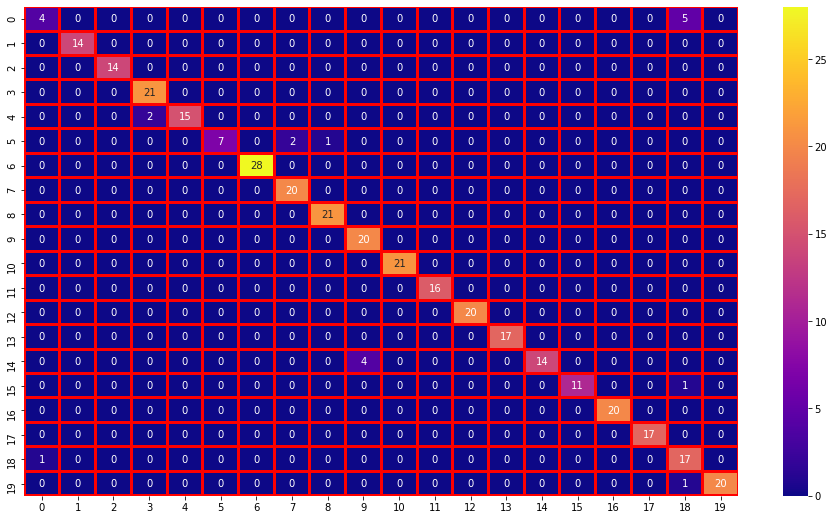

In [53]:
y_pred = svc.predict(X_test)
cn = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(16,9))
sn.heatmap(cn,annot=True,linecolor='red',linewidths=2,cmap='plasma')

In [54]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.44      0.57         9
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       0.91      1.00      0.95        21
           5       1.00      0.88      0.94        17
           6       1.00      0.70      0.82        10
           7       1.00      1.00      1.00        28
           8       0.91      1.00      0.95        20
           9       0.95      1.00      0.98        21
          10       0.83      1.00      0.91        20
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        16
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        17
          17       1.00      0.78      0.88        18
          18       1.00      0.92      0.96        12
          19       1.00      1.00      1.00        20
          20       1.00    

In [55]:
train.shape,temp.shape

((1766, 7), (1766, 8))

In [56]:
train = np.array(train)
predict_list = []
for i in range(0,len(train)):
    predict_list.append(svc.predict([train[i]]))

In [57]:
predict_list = np.array(predict_list)

In [58]:
temp.head()

N     P     K  temperature   humidity        ph    rainfall  label
0   79  34.0  37.0    20.879744  82.002744  6.502985  202.935536      1
13  86  20.0  31.0    24.014976  82.056872  6.984354  185.277339      1
14  75  22.0  56.0    25.665852  80.663850  6.948020  209.586971      1
17  69  45.0  28.0    23.793920  80.418180  6.970860  206.261186      1
20  62  49.0  37.0    21.325042  80.474764  6.442475  185.497473      1

In [59]:
original_labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map_new = {i+1:original_labels[i] for i in range(len(original_labels))}
labels_map_new

{1: 'rice',
 2: 'maize',
 3: 'chickpea',
 4: 'kidneybeans',
 5: 'pigeonpeas',
 6: 'mothbeans',
 7: 'mungbean',
 8: 'blackgram',
 9: 'lentil',
 10: 'pomegranate',
 11: 'banana',
 12: 'mango',
 13: 'grapes',
 14: 'watermelon',
 15: 'muskmelon',
 16: 'apple',
 17: 'orange',
 18: 'papaya',
 19: 'coconut',
 20: 'cotton',
 21: 'jute',
 22: 'coffee'}

In [60]:
temp['Original_labels'] = temp['label'].map(labels_map_new)
temp.head()

N     P     K  temperature   humidity        ph    rainfall  label  \
0   79  34.0  37.0    20.879744  82.002744  6.502985  202.935536      1   
13  86  20.0  31.0    24.014976  82.056872  6.984354  185.277339      1   
14  75  22.0  56.0    25.665852  80.663850  6.948020  209.586971      1   
17  69  45.0  28.0    23.793920  80.418180  6.970860  206.261186      1   
20  62  49.0  37.0    21.325042  80.474764  6.442475  185.497473      1   

   Original_labels  
0             rice  
13            rice  
14            rice  
17            rice  
20            rice

In [61]:
temp['SVM_pred'] = predict_list

In [62]:
temp['Predicted_labels'] = temp['SVM_pred'].map(labels_map_new)
temp.head()

N     P     K  temperature   humidity        ph    rainfall  label  \
0   79  34.0  37.0    20.879744  82.002744  6.502985  202.935536      1   
13  86  20.0  31.0    24.014976  82.056872  6.984354  185.277339      1   
14  75  22.0  56.0    25.665852  80.663850  6.948020  209.586971      1   
17  69  45.0  28.0    23.793920  80.418180  6.970860  206.261186      1   
20  62  49.0  37.0    21.325042  80.474764  6.442475  185.497473      1   

   Original_labels  SVM_pred Predicted_labels  
0             rice         1             rice  
13            rice        21             jute  
14            rice         1             rice  
17            rice        21             jute  
20            rice        21             jute

<AxesSubplot:xlabel='Original_labels', ylabel='count'>

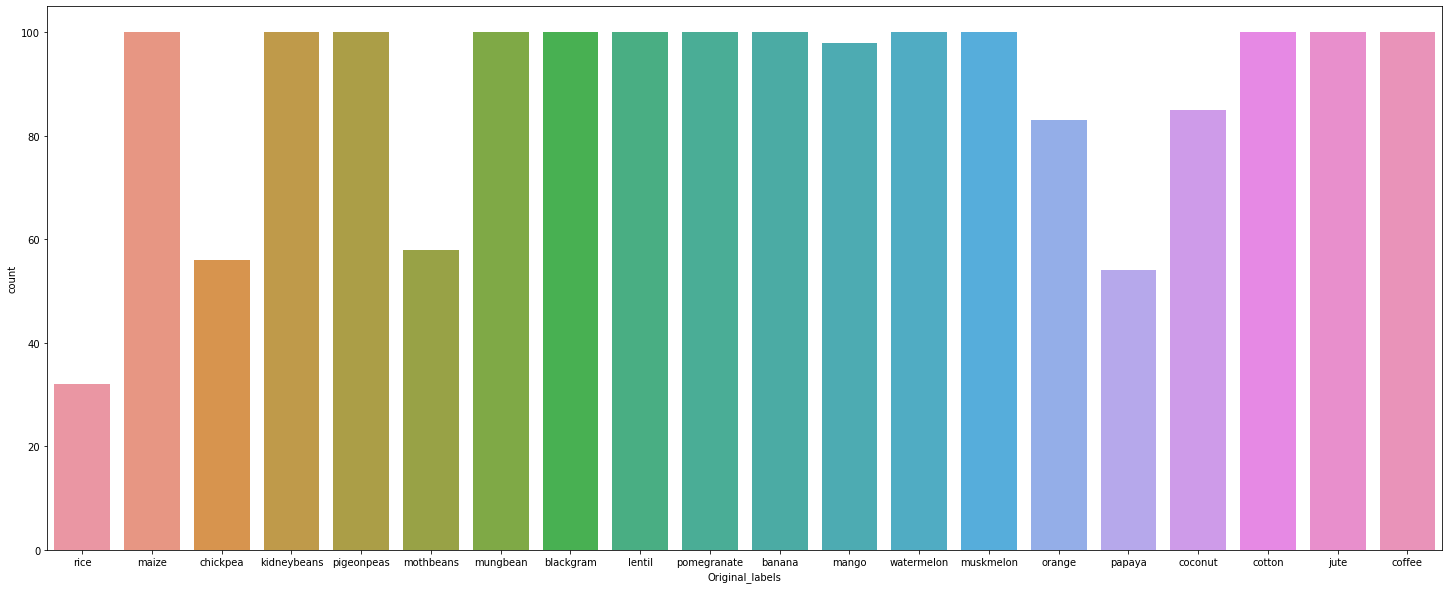

In [63]:
plt.figure(figsize=(25,10))
sn.countplot(data=temp,x = 'Original_labels')


<AxesSubplot:xlabel='Predicted_labels', ylabel='count'>

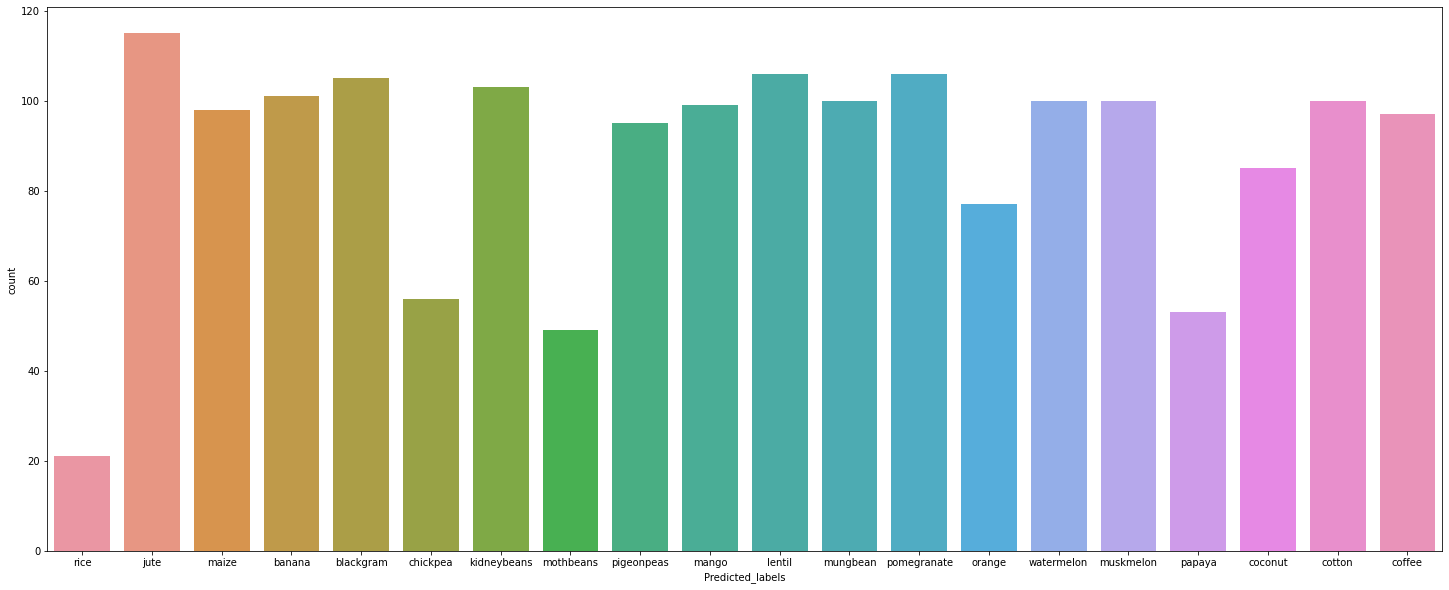

In [64]:
plt.figure(figsize=(25,10))
sn.countplot(data = temp,x = 'Predicted_labels')

In [65]:
temp['Predicted_labels'].value_counts()

jute           115
pomegranate    106
lentil         106
blackgram      105
kidneybeans    103
banana         101
cotton         100
watermelon     100
muskmelon      100
mungbean       100
mango           99
maize           98
coffee          97
pigeonpeas      95
coconut         85
orange          77
chickpea        56
papaya          53
mothbeans       49
rice            21
Name: Predicted_labels, dtype: int64

In [66]:
temp['Original_labels'].value_counts()

pomegranate    100
kidneybeans    100
cotton         100
banana         100
pigeonpeas     100
coffee         100
maize          100
muskmelon      100
mungbean       100
blackgram      100
jute           100
lentil         100
watermelon     100
mango           98
coconut         85
orange          83
mothbeans       58
chickpea        56
papaya          54
rice            32
Name: Original_labels, dtype: int64

In [67]:
a = temp[temp['Original_labels']!=temp['Predicted_labels']].style.background_gradient('plasma')
a

In [68]:
tru = temp['Original_labels'].values
tru = list(tru.flatten())
predict = temp['Predicted_labels'].values
predict = list(predict.flatten())

In [69]:
count = 0
for i,j in zip(tru,predict):
    if i!=j:
        
        count+=1

In [73]:
print(f'Total Values after Preprocessing : {temp.shape[0]}\nClassified values are : {temp.shape[0]-count}\nMissclassified values are: {count}')

Total Values after Preprocessing : 1766
Classified values are : 1707
Missclassified values are: 59


In [74]:
# 21st label is jute!

data = np.array([[98,36,44,23.97898217,81.45061596,7.50283396,250.0832336]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])

data = np.array([[89,42,13,25.70196694,61.33450447,6.960358276,83.20711308]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])


data = np.array([[24,28,13,27.65280218,89.80650642,6.459252023,56.52558045]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])

rice
maize
mungbean
